In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [3]:
data_path = '/home/earthquakes1/homes/Rebecca/phd/stf/data/USGS/'

In [4]:
eq = '19900418_133919.txt'

In [5]:
momentrate = []
time = []

with open(data_path + eq, 'r') as f:
    data = f.readlines()
    for line in data:
        line = line.split()
        time.append(float(line[0]))
        momentrate.append(float(line[1]))

    momentrate = np.array(momentrate)
    time = np.array(time)

    not_zero = np.where(momentrate > 0)[0]

    start = min(not_zero)
    end = max(not_zero)

    time = time[:end]
    momentrate = momentrate[:end]

Text(0.5, 0, 'Time (s)')

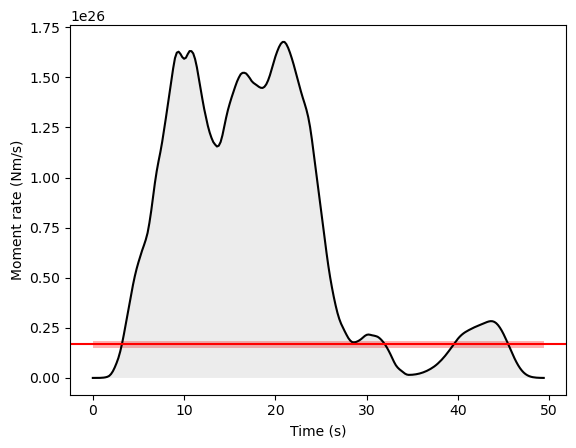

In [6]:
plt.plot(time, momentrate, color='k')
plt.axhline(max(momentrate)/10, color='r')
plt.fill_between(time, 9*max(momentrate)/100, 11*max(momentrate)/100, facecolor='red', alpha=0.3)

plt.fill_between(time, momentrate, 0, where=momentrate>0, facecolor='grey', alpha=0.15)

plt.ylabel('Moment rate (Nm/s)')
plt.xlabel('Time (s)')

the end of this STF is picked about 29 s, does the moment rate function reach 10% of max?

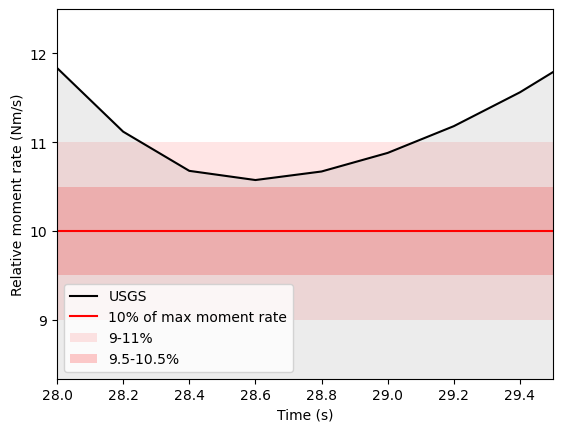

In [13]:
plt.plot(time, momentrate, color='k', label = 'USGS')
plt.fill_between(time,
                 momentrate, 0,
                 facecolor='grey',
                 alpha=0.15)

plt.axhline(max(momentrate)/10, color='r', label='10% of max moment rate')
plt.fill_between(time,
                 11*max(momentrate)/100,
                 9*max(momentrate)/100,
                 facecolor='red',
                 alpha=0.1,
                 label='9-11%')
plt.fill_between(time,
                 10.5*max(momentrate)/100,
                 9.5*max(momentrate)/100,
                 facecolor='red',
                 alpha=0.2,
                 label='9.5-10.5%')

plt.yticks(np.arange(0, max(momentrate),
           step=max(momentrate)/100),
           np.arange(0, 100, step=1))

plt.xlim([28,29.5])
plt.ylim([max(momentrate)/12, max(momentrate)/8])

plt.ylabel('Relative moment rate (Nm/s)')
plt.xlabel('Time (s)')
plt.legend()

In [8]:
less_than_11 = np.where(momentrate <= 11*max(momentrate)/100)[0]

In [9]:
total_moment = scipy.integrate.simpson(momentrate[0:end],
                                       dx = time[1]-time[0])


In [20]:
for i in less_than_11:
    if i == 0:
        continue
    moment = scipy.integrate.simpson(momentrate[0:i],
                                       dx = time[1]-time[0])
    if moment >= 0.5 * total_moment:
        print(f'first time where < 11% of total momentrate and 50% of moment released: {time[i]} s')
        print(f'proportion of moment released: {(moment/total_moment)*100:.2f}%')
        break


first time where < 11% of total momentrate and 50% of moment released: 28.4 s
proportion of moment released: 91.11%
